In [29]:
# Imports
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [11]:
# Clustering select few companies
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [12]:
# Data source
source = 'yahoo'

# Start and end date
start = '2017-01-01'
end = '2021-01-01'

# Using the pandas data reader to get the data
data = web.DataReader(list(companies_dict.values()), source, start, end)

print(data.axes)

[DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None), MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'IBM'),
            ('Adj Close',  'TXN'),
            ...
            (   'Volume',  'PEP'),
            (   'Volume',   'KO'),
            (   'Volume',  'JNJ'),
            (   'Volume',   'TM'),
            (   'Volume',  

In [13]:
# Find the opening and closing prices
stock_close = data['Close']
stock_open = data['Open']

print(stock_close.iloc[0])

Symbols
AMZN    753.669983
AAPL     29.037500
WBA      82.959999
NOC     234.889999
BA      156.970001
LMT     253.309998
MCD     119.620003
INTC     36.599998
IBM     167.190002
TXN      73.580002
MA      105.389999
MSFT     62.580002
GE       30.471153
AXP      75.349998
PEP     104.650002
KO       41.799999
JNJ     115.839996
TM      118.550003
HMC      29.610001
XOM      90.889999
CVX     117.849998
VLO      70.419998
F        12.590000
BAC      22.530001
Name: 2017-01-03 00:00:00, dtype: float64


In [15]:
# Calculate the daily stock movement
# Clustering will be done based on this movement

stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# Create a zeroes dataset 
movements = np.zeros([row, col])

for i in range(0, row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [16]:
# Print the movement on day 1 as a test
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: -0.3032808303833008
Company: Amazon, Change: 0.744384765625
Company: American Express, Change: 18.264437675476074
Company: Boeing, Change: 19.741379737854004
Company: Bank of America, Change: -7.913106918334961
Company: Chevron, Change: -9.701462745666504
Company: Ford, Change: 9.763718605041504
Company: General Electric, Change: 9.349786758422852
Company: Honda, Change: 4.272495269775391
Company: IBM, Change: -3.398898124694824
Company: Intel, Change: 0.14672279357910156
Company: Johnson & Johnson, Change: -3.453489303588867
Company: Coca Cola, Change: -7.283647537231445
Company: Lockheed Martin, Change: 8.718873023986816
Company: MasterCard, Change: 18.269606590270996
Company: McDonalds, Change: 14.456962585449219
Company: Microsoft, Change: 5.022110939025879
Company: Northrop Grumman, Change: -5.72247314453125
Company: Pepsi, Change: -7.904994964599609
Company: Toyota, Change: -7.864269256591797
Company: Texas Instruments, Change: -3.108492851257324
Company: 

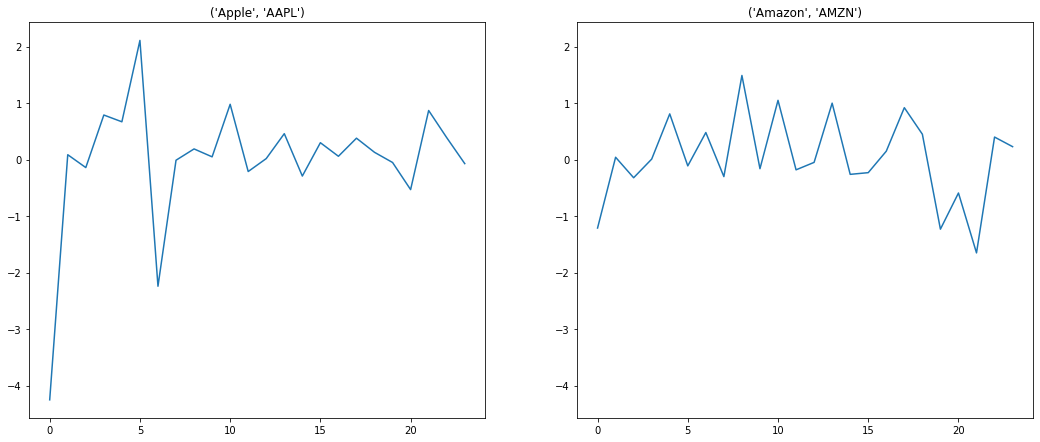

In [17]:
# Analyzing the data of the first two companies by movement
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [19]:
# Normalization of the data since there are different scales

normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.9990575753245948
-0.9988272862428426
0.002666752746304669


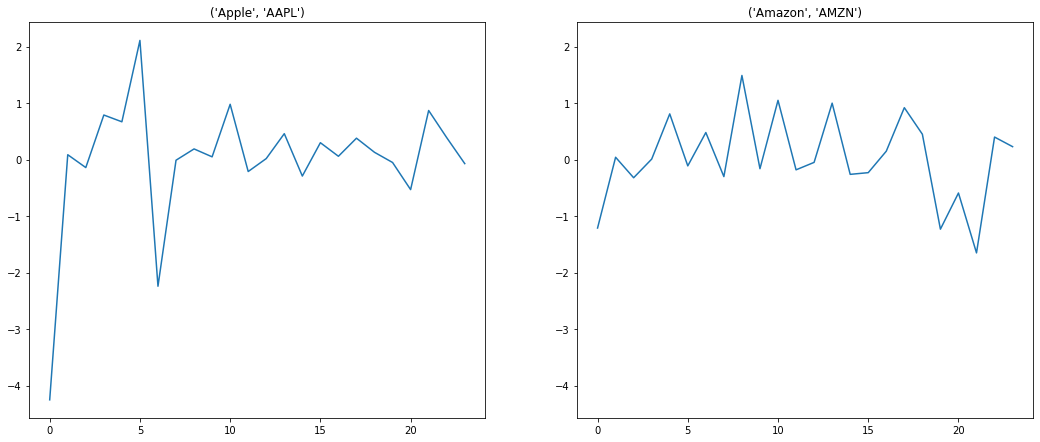

In [20]:
# Replot to see how the normalized data looks
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

# In this case there is no change because the first two companies were already normalized by default
# But it will change for other companies that are not on the same scale

In [24]:
# Clustering with K-means

normalizer = Normalizer()

# 10 cluster model
kmeans = KMeans(n_clusters=10, max_iter=1000)

# Pipeline to chain the normalizer with kmeans
pipeline = make_pipeline(normalizer, kmeans)

# Fit the pipeline to the stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [25]:
print(kmeans.inertia_)  # Lower the score, the better it is

236.50119345400913


In [28]:
# Predicting cluster labels

labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies

temp = {'labels': labels, 'companies': companies}
df = pd.DataFrame.from_dict(temp, orient='index')
# print(df.sort_values('labels'))
print(df)

                    0               1                        2     \
labels                 1               5                        2   
companies  (Apple, AAPL)  (Amazon, AMZN)  (American Express, AXP)   

                   3                       4               5          6     \
labels                2                       6               6          2   
companies  (Boeing, BA)  (Bank of America, BAC)  (Chevron, CVX)  (Ford, F)   

                             7             8           9     ... 997  998   \
labels                          2             8           9  ...  9.0  1.0   
companies  (General Electric, GE)  (Honda, HMC)  (IBM, IBM)  ...  NaN  NaN   

          999  1000 1001 1002 1003 1004 1005 1006  
labels     0.0  4.0  1.0  9.0  2.0  2.0  1.0  1.0  
companies  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 1007 columns]


In [31]:
# Applying PCA (Principal Component Analysis)

reduced_data = PCA(n_components=2).fit_transform(new)

kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

t = {'labels': labels, 'companies': companies}
df = pd.DataFrame.from_dict(t, orient='index')

print(df)

                    0               1                        2     \
labels                 8               5                        6   
companies  (Apple, AAPL)  (Amazon, AMZN)  (American Express, AXP)   

                   3                       4               5          6     \
labels                1                       7               7          6   
companies  (Boeing, BA)  (Bank of America, BAC)  (Chevron, CVX)  (Ford, F)   

                             7             8           9     ... 997  998   \
labels                          6             1           0  ...  4.0  0.0   
companies  (General Electric, GE)  (Honda, HMC)  (IBM, IBM)  ...  NaN  NaN   

          999  1000 1001 1002 1003 1004 1005 1006  
labels     1.0  9.0  0.0  0.0  6.0  9.0  0.0  0.0  
companies  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 1007 columns]


<Figure size 432x288 with 0 Axes>

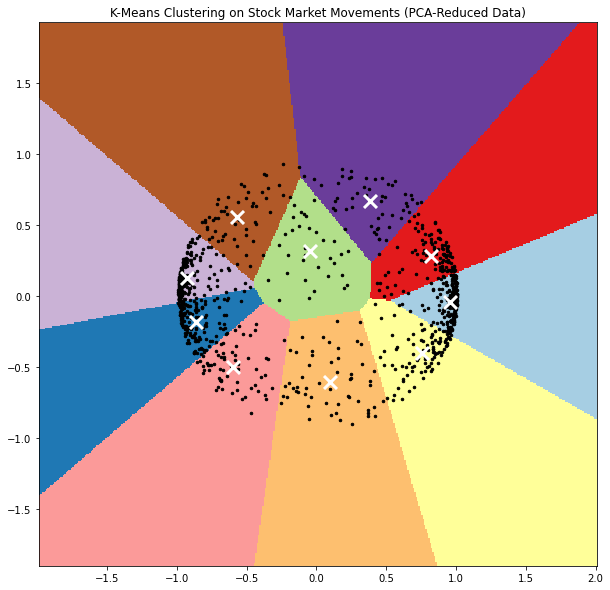

In [32]:
# Displaying the results graphically

# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define colorplot
cmap = plt.cm.Paired

# Plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
